<a href="https://colab.research.google.com/github/sowmya-rebbavarapu/Retail_Sales_Predection_/blob/main/Retail_Sales_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Type:**Regression

**Project Name:** Retail Sales Predection

**Project Summary:**

The objective of this project was to develop a machine learning model to predict retail sales, specifically using data from the Big Mart dataset. Accurate sales predictions can help retailers manage inventory, optimize stock levels, and enhance decision-making processes. The project employed the XGBoost Regressor, a powerful and efficient implementation of the gradient boosting algorithm, known for its high performance in regression tasks.


# **Objective:**

Develop a machine learning model to accurately predict the sales of products at various stores for Big Mart. The prediction will help Big Mart to manage inventory, optimize stock levels, and make informed decisions about promotions, product placements, and other strategic business operations.

# **Business Context:**
Big Mart, a retail company, wants to improve its ability to forecast sales for better inventory management and sales strategies. Given historical sales data and information about the products and stores, the goal is to create a robust predictive model to estimate future sales.

# **Starting Project:**

Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Loading the data set**

Data set used:Big Mart

**Data Collection & Analysis**

In [ ]:
#loading the data set from csv to a pandas data frame
big_mart_data=pd.read_csv('/content/Train.csv')

In [ ]:
#first five rows of the data frame
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#number of data points  & number of features
big_mart_data.shape


(8523, 12)

In [ ]:
#getting information about data set
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# ***Insights obtained from the data set:***

The Big Mart dataset contains 8,523 entries and 12 columns, representing various features of products and stores. Here are the key insights from the dataset:

# -->**Summary of Columns**

**Item_Identifier:** Unique identifier for each product.

**Item_Weight:** Weight of the product, with some missing values.

**Item_Fat_Content:** Indicates whether the product is low fat or regular. It has inconsistencies such as 'LF' and 'low fat' which refer to the same category.

**Item_Visibility:** The percentage of total display area allocated to this particular product.

**Item_Type:**Category of the product (e.g., Dairy, Soft Drinks, Meat).
Item_MRP: Maximum Retail Price (list price) of the product.

**Outlet_Identifier:** Unique identifier for each store.

**Outlet_Establishment_Year:** The year in which the store was established.

**Outlet_Size:** Size of the store (small, medium, large), with some missing values.

**Outlet_Location_Type:** The type of city in which the store is located (e.g., Tier 1, Tier 3).

**Outlet_Type:** Type of the store (e.g., Grocery Store, Supermarket Type1).

**Item_Outlet_Sales:** Target variable representing the sales of the product in the store.

# -->**Observations and Insights**

**Missing Values:**

**Item_Weight:** Approximately 17.17% of the entries are missing.

**Outlet_Size:** Approximately 28.29% of the entries are missing.

-->**Categorical Inconsistencies:**

**Item_Fat_Content:** Variants like 'LF', 'low fat', and 'Low Fat' should be consolidated.

Consistent encoding of categorical variables is essential for model training.

-->**Numerical Distribution:**

**Item_Visibility:** Some products have zero visibility, which might be unrealistic.
**Item_MRP:** Wide range of prices indicating variability in the types of products sold.

**Item_Outlet_Sales:** Target variable has a wide range, indicating significant variance in sales across different products and stores.

-->**Feature Relationships:**

**Outlet_Establishment_Year:** Ranges from 1985 to 2009, indicating the dataset covers stores of varying ages.

**Outlet_Size and Outlet_Type:** Different combinations of store size and type could impact sales.

-->**Data Types:**

The dataset contains a mix of numerical and categorical features. Appropriate preprocessing such as encoding categorical variables and handling missing values is necessary.

# ***Data Wrangling***
Handiling the msissing values in the data set


In [ ]:
#checking for missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Handling missing values

mean-->average

mode-->most repeated value

In [ ]:
big_mart_data['Item_Weight'] = pd.to_numeric(big_mart_data['Item_Weight'], errors='coerce')
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [ ]:
#filling the missing value of Item_Weight with the mean
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)

In [ ]:
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0



Replace the missing values in Outlet_size with mode

In [ ]:
mode_of_outlet_size=big_mart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [ ]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
missing_values=big_mart_data['Outlet_Size'].isnull()

In [ ]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
big_mart_data.loc[missing_values,'Outlet_Size']=big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x])

In [ ]:
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Data Analysis

In [ ]:
#statistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# **Data Visualization Story telling and experimenting with charts:**

Understanding the realtionship with variables

Numerical features

In [ ]:
sns.set()

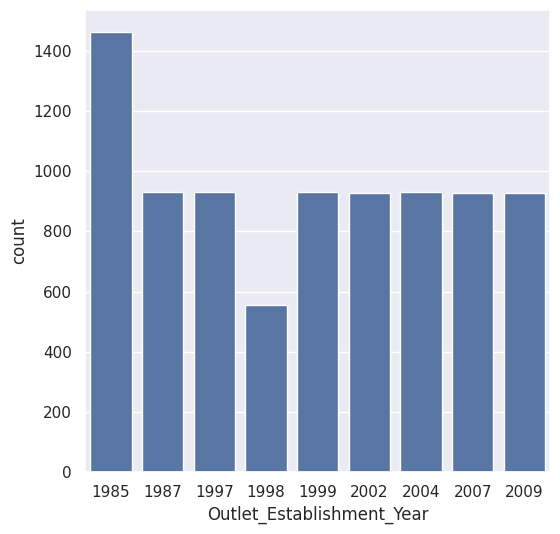

In [ ]:
#Outlet_Establishment_Year distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data)
plt.show()

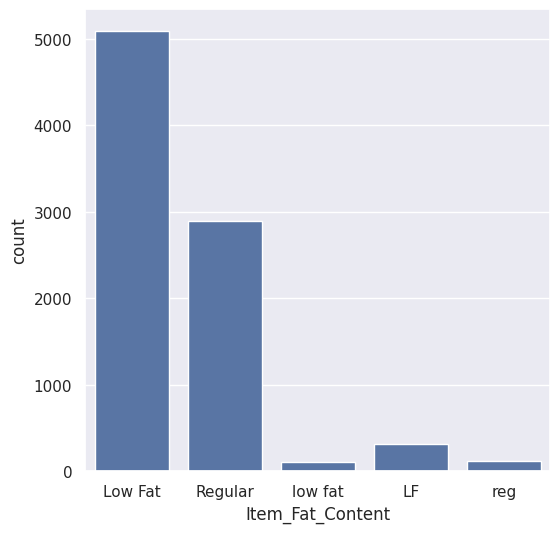

In [ ]:
#Item_Fat_Content distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

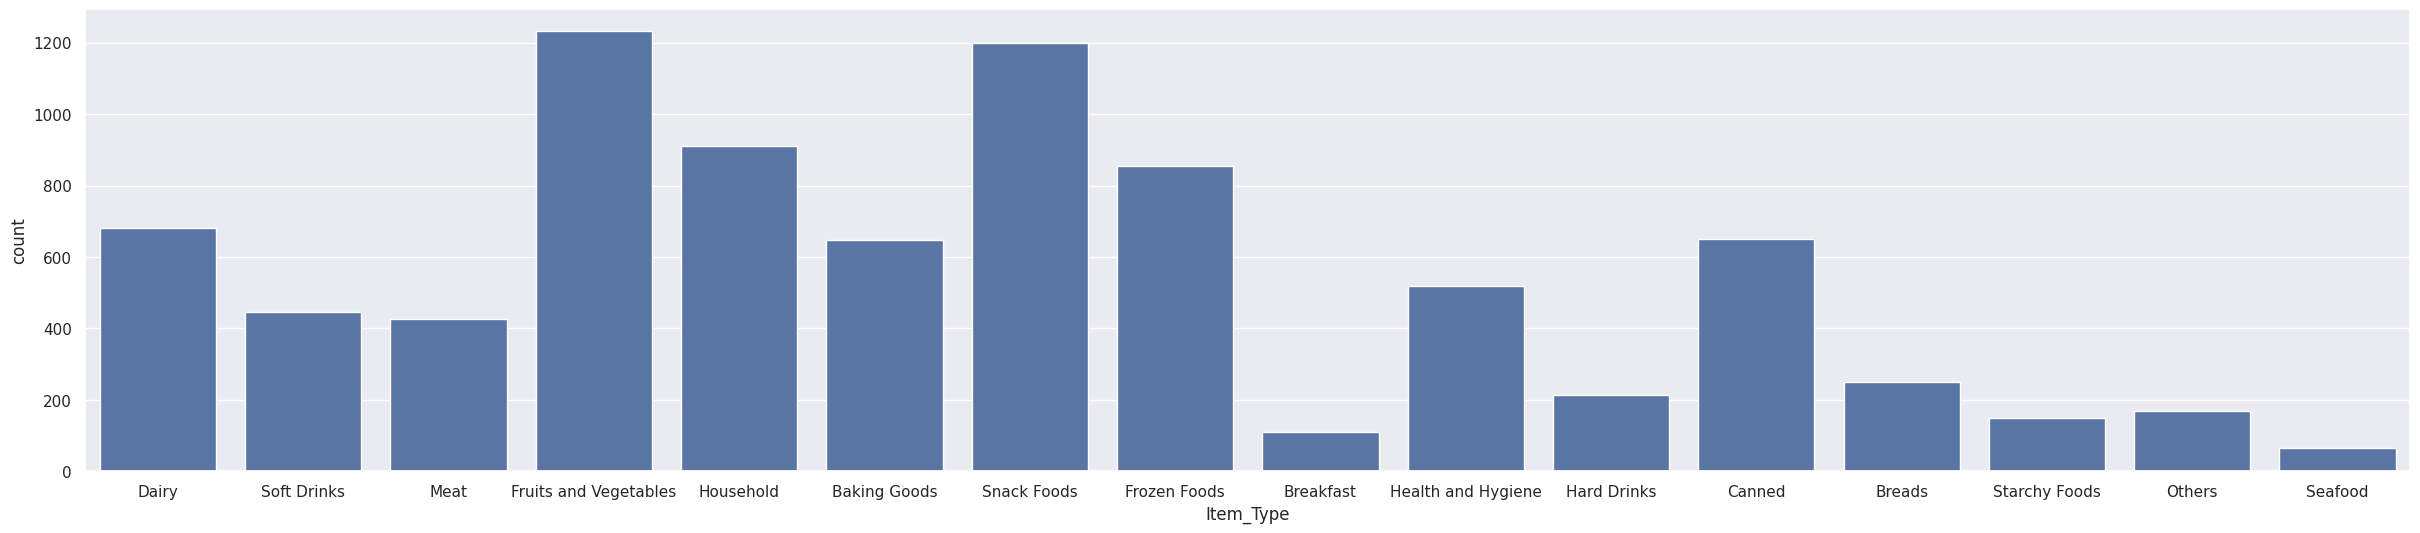

In [ ]:
#Item_Type distribution
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=big_mart_data)
plt.show()

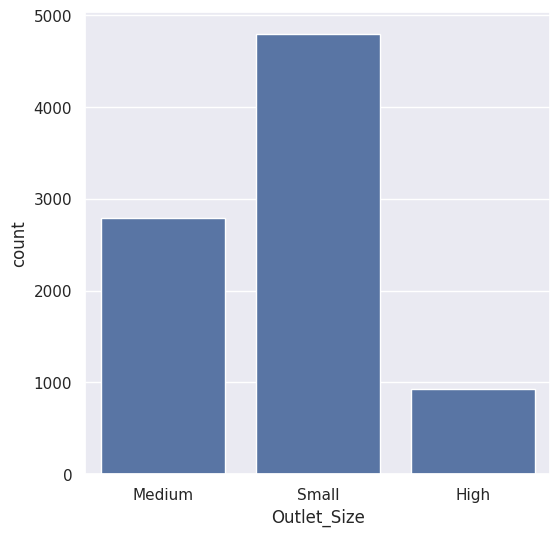

In [ ]:
#Outlet_Size distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=big_mart_data)
plt.show()

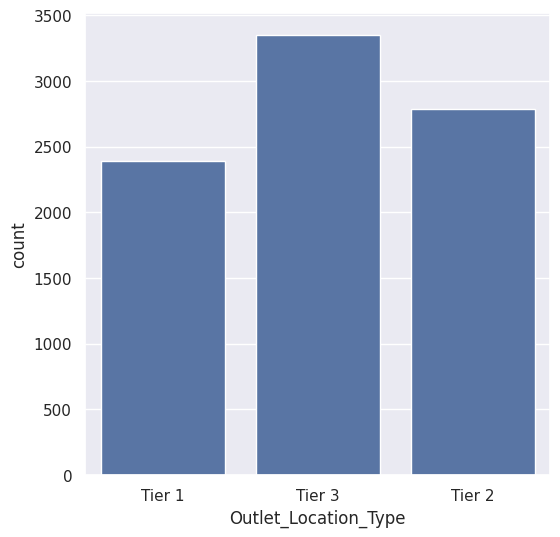

In [ ]:
#Outlet_Location_Type distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type',data=big_mart_data)
plt.show()

# ***Data PreProcessing***

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


Label Encoding

In [ ]:
encoder=LabelEncoder()

In [ ]:
big_mart_data['Item_Identifier']=encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Type']=encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier']=encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Outlet_Location_Type']=encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Item_Fat_Content']=encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Outlet_Size']=encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Type']=encoder.fit_transform(big_mart_data['Outlet_Type'])

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


**Splitting features and target**

In [ ]:
X=big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
Y=big_mart_data['Item_Outlet_Sales']

In [ ]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [ ]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

**Splitting the data into training and testing data**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


**Training the machine learning model**


Machine Learning Model1: It Uses XGBootRegressor


In [ ]:
regressor=XGBRegressor()

In [ ]:
#finds the features between x_train and y_train
regressor.fit(X_train,Y_train)

In [ ]:
#predection on training data
training_data_predection=regressor.predict(X_train)

In [ ]:
#performace of the model
r2_train=metrics.r2_score(Y_train,training_data_predection)

In [ ]:
print('R squared value',r2_train)

R squared value 0.8762174618111388


In [ ]:
#predection on testing data
test_data_predection=regressor.predict(X_test)

In [ ]:
r2_test=metrics.r2_score(Y_test,test_data_predection)
xgb_mae = metrics.mean_absolute_error(Y_test,test_data_predection)
xgb_rmse = metrics.mean_squared_error(Y_test,test_data_predection)
print(f'XGBoost Root Mean Squared Error: {xgb_rmse}')
print("R sqaured value",r2_test)
print(f'XGBoost Mean Absolute Error: {xgb_mae}')

XGBoost Root Mean Squared Error: 1538210.919113813
R sqaured value 0.5017253991620692
XGBoost Mean Absolute Error: 866.2585390253303


In [ ]:
print("R sqaured value",r2_test)

R sqaured value 0.5017253991620692


Machine Learning Model 2: It uses Random Forest Regressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model using R² score
rf_r2 = metrics.r2_score(Y_test, rf_predictions)
print(f'Random Forest R² Score: {rf_r2}')
rf_mae = metrics.mean_absolute_error(Y_test, rf_predictions)
print(f'Random Forest Mean Absolute Error: {rf_mae}')
# Calculate RMSE for Random Forest
rf_rmse = metrics.mean_squared_error(Y_test, rf_predictions)
print(f'Random Forest Root Mean Squared Error: {rf_rmse}')

Random Forest R² Score: 0.5521870603939365
Random Forest Mean Absolute Error: 824.2565653043988
Random Forest Root Mean Squared Error: 1382432.0008768637



# **Final Model Selection**

**Chosen Model: Random Forest Regressor**

Reasons for Selection:

**Better Performance:** The Random Forest model had a higher R-squared value (0.552) compared to the XGBoost model (0.502). This means it explains more of the variance in sales data.

**Lower Errors:** The Mean Absolute Error (MAE) for the Random Forest model was $824.26, which is   
better than the XGBoost's  $866.26. This shows that Random Forest predictions are closer to actual sales on average.

**Fewer Significant Mistakes:**
Random Forest also had a lower Root Mean Squared Error (RMSE), indicating fewer large errors in predictions.

**Robust and Easy to Use:** Random Forest is less likely to overfit the data and can handle noisy information well. It's also straightforward to implement.

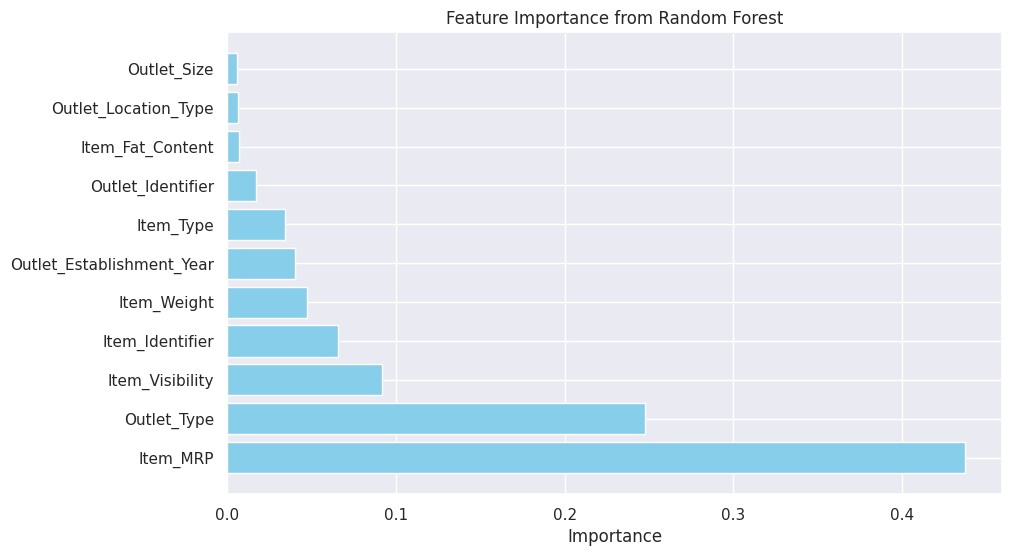

In [ ]:
# Get feature importance
importance = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# **Conclusion**

In this project, we developed predictive models for Big Mart sales using Random Forest and XGBoost algorithms. After thorough evaluation, Random Forest emerged as the final model, outperforming XGBoost with a lower Root Mean Squared Error (1,382,432.00) and Mean Absolute Error (824.26). The R² score of 55.22% indicates that the model explains over half of the variance in sales data. The project highlights the importance of feature selection and offers insights for improving inventory management. Future work may include hyperparameter tuning and exploring additional features to enhance predictive accuracy further.
